In [ ]:
import cv2
import os
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow

In [ ]:
def name_map(x):
    if x=='sachin':
        return 0
    if x=='obama':
        return 1
    if x=='messi':
        return 2

In [ ]:
def detect_face(img):
    gray =  cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    face_cascade1 = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')   
    faces = face_cascade1.detectMultiScale(gray,scaleFactor =1.2,minNeighbors=5);
    if (len(faces)==0):
        return None,None
    (x,y,w,h)=faces[0]
    return gray[y:y+w,x:x+h],faces[0]

In [ ]:
def prepare_training_data(data_folder_path):
    dirs = os.listdir(data_folder_path)
    faces =[]
    labels = []
    
    for dir_name in dirs:
        label = dir_name
        subject_dir_path = data_folder_path + "/" + dir_name
        
        subject_image_name = os.listdir(subject_dir_path)
        for image_name in subject_image_name:
            if image_name.startswith(","):
                continue;
            image_path = subject_dir_path + "/" + image_name
            image = cv2.imread(image_path)
            cv2_imshow(image)
            # cv2.waitkey(100)
            face,rect = detect_face(image)
            cv2.imwrite("opencv/%s%s"%(dir_name,image_name),face)
            if face is not None:
                faces.append(face)
                labels.append(name_map(label))
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    
    
    return faces,labels

preparing data


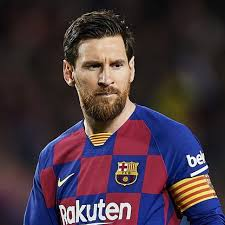

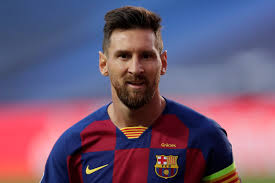

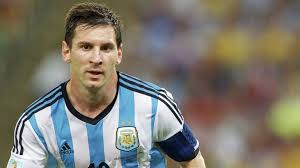

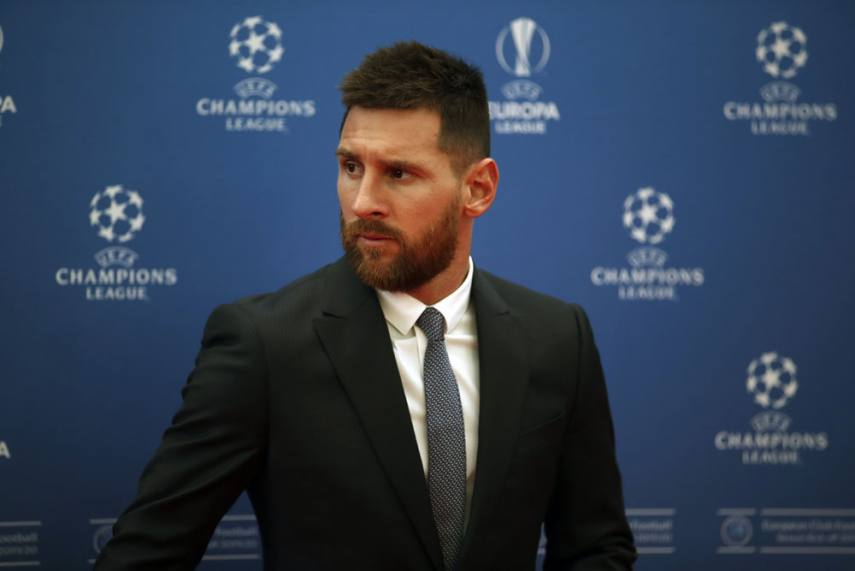

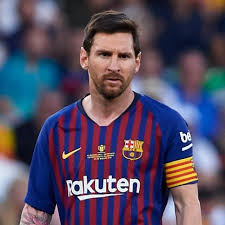

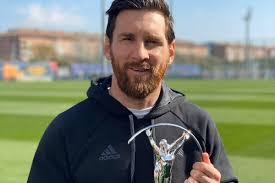

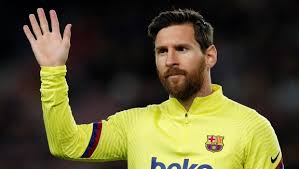

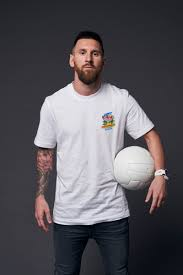

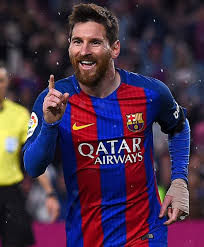

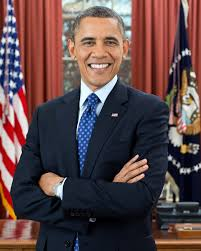

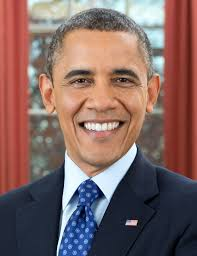

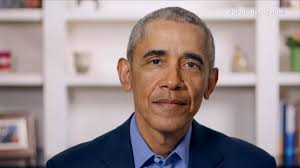

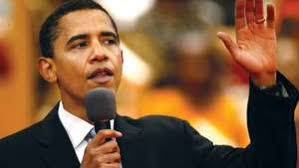

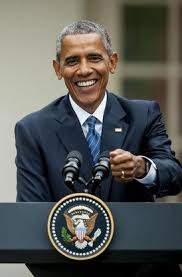

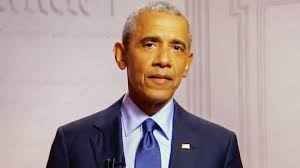

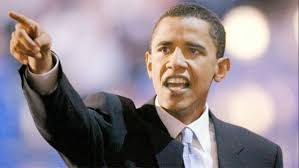

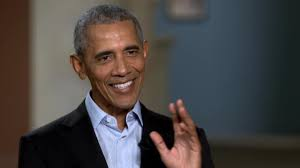

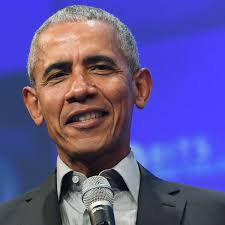

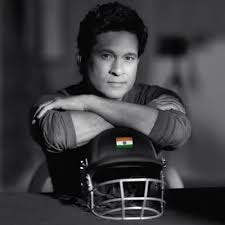

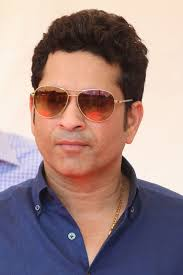

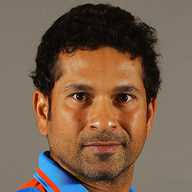

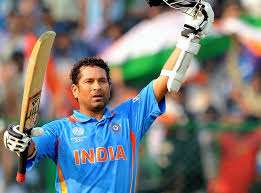

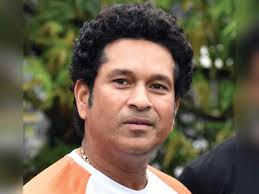

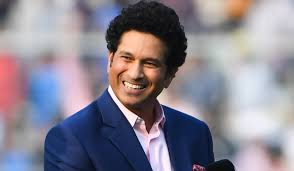

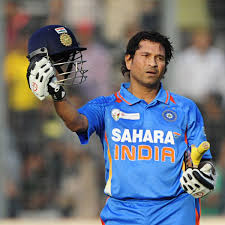

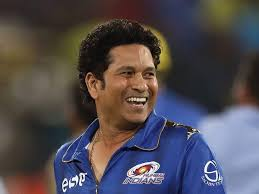

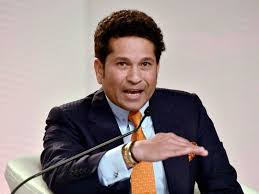

data prepare
Total faces: 27
total labels: 27


In [ ]:
print("preparing data")
faces,labels = prepare_training_data('/content/drive/MyDrive/OPENCV-IMAGES/images')
print("data prepare")


print('Total faces:', len(faces))
print("total labels:", len(labels))

In [ ]:
face_reg = cv2.face.LBPHFaceRecognizer_create()
face_reg.train(faces,np.array(labels))

In [ ]:
def draw_rectangle(img,rect):
    (x,y,w,h) = rect
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),2)
    
def draw_text(img,text,x,y):
    cv2.putText(img,text,(x,y),cv2.FONT_HERSHEY_PLAIN,1.5,(255,255,255),2)

predicting images
prediction complete


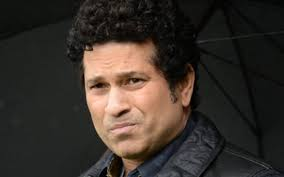

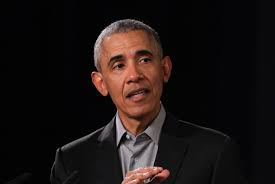

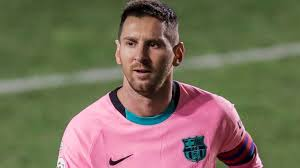

In [ ]:
def predict(test_img):
    img = test_img.copy()
    face,rect = detect_face(img)
    try:
        label = face_reg.predict(faces)
        # label = face_reg.predict(face)
        label_text = get_name(label[0])
        draw_rectangle(img,rect)
        draw_text(img,label_text,rect[0],rect[1]-5)
    except:
        pass
    return img

print("predicting images")

test_image1 = cv2.imread("/content/drive/MyDrive/OPENCV-IMAGES/sachin.jpg")
test_image2 = cv2.imread("/content/drive/MyDrive/OPENCV-IMAGES/obama.jpg")
test_image3 = cv2.imread("/content/drive/MyDrive/OPENCV-IMAGES/messi.jpg")

pred_img1 = predict(test_image1)
pred_img2 = predict(test_image2)
pred_img3 = predict(test_image3)
print("prediction complete")

cv2_imshow(pred_img1)
cv2_imshow(pred_img2)
cv2_imshow(pred_img3)

cv2.waitKey(0)
cv2.destroyAllWindows()